In [111]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

In [112]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [113]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)


X_train = X_train.astype('float32') # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255 # normalize 
X_test /= 255

In [114]:
# one-hot format classes

nb_classes = 10 # number of unique digits

y_train = tf.one_hot(y_train, nb_classes)
y_test = tf.one_hot(y_test, nb_classes)

y_test.shape
y_train.shape

TensorShape([60000, 10])

In [115]:
zoom_range=0.08 # define zoom range
# Create ImageDataGenerator training instance with data augmentation
train_datagen = ImageDataGenerator(zoom_range=zoom_range, # zoom into the image
                                   width_shift_range=(0.08, 2), # shift the image width ways
                                   height_shift_range=(0.08, 2) ) # shift the image height ways

valid_datagen = ImageDataGenerator()

In [116]:
# define number of rows & columns
num_row = 2
num_col = 8
num = num_row*num_col

TRAIN:



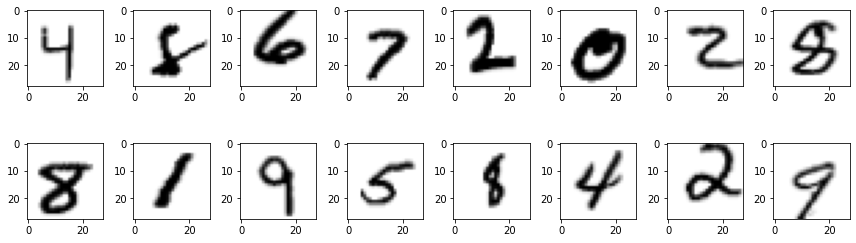

In [117]:
print('TRAIN:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in train_datagen.flow(X_train ,y_train):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
     break
plt.tight_layout()
plt.show()

In [118]:
train_generator = train_datagen.flow(X_train, y_train)
test_generator = valid_datagen.flow(X_test, y_test)

In [125]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1))),
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [120]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 flatten_12 (Flatten)        (None, 10816)             0         
                                                                 
 dense_24 (Dense)            (None, 128)               1384576   
                                                     

In [121]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])


history = model.fit(train_generator, validation_data=test_generator,  steps_per_epoch=60000//128, epochs=10)


Epoch 1/10
468/468 [==============================] - 10s 21ms/step - loss: 0.6504 - accuracy: 0.7864 - val_loss: 0.1043 - val_accuracy: 0.9707
Epoch 2/10
468/468 [==============================] - 10s 21ms/step - loss: 0.2862 - accuracy: 0.9127 - val_loss: 0.0806 - val_accuracy: 0.9742
Epoch 3/10
468/468 [==============================] - 10s 20ms/step - loss: 0.2376 - accuracy: 0.9291 - val_loss: 0.0466 - val_accuracy: 0.9850
Epoch 4/10
468/468 [==============================] - 10s 21ms/step - loss: 0.1827 - accuracy: 0.9449 - val_loss: 0.0440 - val_accuracy: 0.9857
Epoch 5/10
468/468 [==============================] - 10s 21ms/step - loss: 0.1656 - accuracy: 0.9492 - val_loss: 0.0420 - val_accuracy: 0.9860
Epoch 6/10
468/468 [==============================] - 10s 21ms/step - loss: 0.1516 - accuracy: 0.9544 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 7/10
468/468 [==============================] - 10s 21ms/step - loss: 0.1501 - accuracy: 0.9551 - val_loss: 0.0359 - val_accuracy:

Text(0.5, 0, 'epochs')

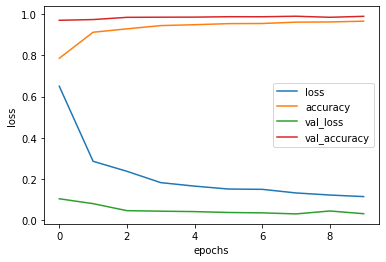

In [122]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [123]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9899


[0.03175603970885277, 0.9898999929428101]

In [124]:
model.save("model.h5")